In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("match.csv")

In [3]:
# filter 

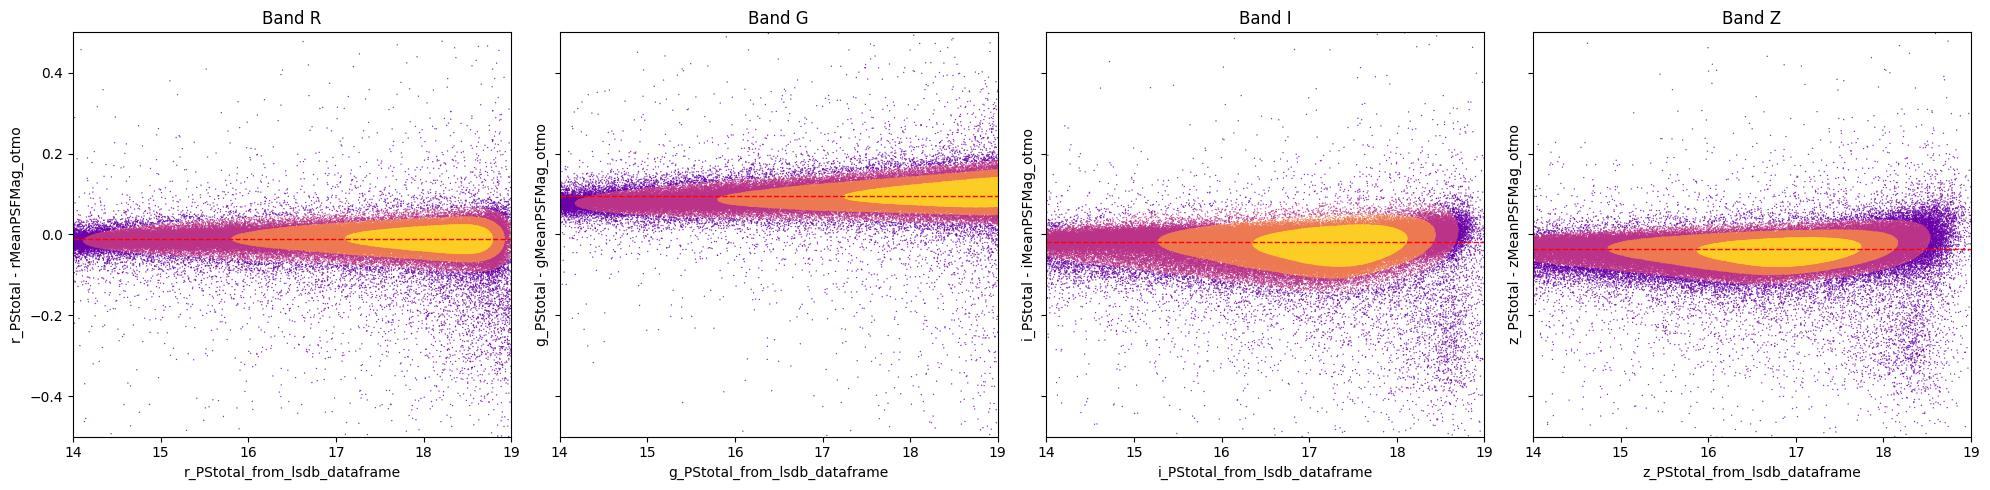

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.colors import ListedColormap

# Define the bands.
bands = ['r', 'g', 'i', 'z']
snr_labels = bands  # one label per band

# Create a discrete plasma palette.
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(snr_labels)))
cmap_plasma = ListedColormap(colors)

# Create a single row of 4 subplots.
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

for i, band in enumerate(bands):
    ax = axs[i]
    
    # Filter rows where the PSF magnitude is between 10 and 22.
    mask = df[f"{band}MeanPSFMag_otmo"].between(10, 22)
    
    # x: total magnitude from the LSDB dataframe.
    # y: difference between total magnitude and the PSF magnitude.
    x = df.loc[mask, f"{band}_PStotal_from_lsdb_dataframe"].values
    y = x - df.loc[mask, f"{band}MeanPSFMag_otmo"].values
    
    # Compute the density at each point using a Gaussian KDE.
    xy = np.vstack([x, y])
    density = stats.gaussian_kde(xy)(xy)
    
    # Sort points by density so that lower-density points are plotted on top.
    idx = density.argsort()
    x, y, density = x[idx], y[idx], density[idx]
    
    # Create a scatter plot with point color given by the density.
    sc = ax.scatter(x, y, s=1, c=density, cmap=cmap_plasma, edgecolor='none', alpha=0.8)
    
    # Add a horizontal median line.
    median_y = np.median(y)
    ax.axhline(median_y, color='red', linestyle='--', linewidth=1)
    
    ax.set_title(f"Band {band.upper()}")
    ax.set_xlim(14, 19)
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel(f"{band}_PStotal_from_lsdb_dataframe")
    ax.set_ylabel(f"{band}_PStotal - {band}MeanPSFMag_otmo")

plt.tight_layout()
plt.show()